In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.precision', 18)
np.set_printoptions(precision=18)

In [3]:
def upload_df(file_path, start_basis_size = 900):
  df = pd.read_csv(file_path)
  df['Basis Size'] = df['Basis Size'].astype(int)

  for i in range(df['Basis Size'].values[0],start_basis_size + 1,100):
    df.drop(df[df['Basis Size'] == i].index, inplace = True)

  return df

In [4]:
def upload_df1(file_path):
  df = pd.read_csv(file_path)
  df['basis size'] = df['basis size'].astype(int)

  return df[2:]

In [23]:
def upload_basis(file_path):
  df = pd.read_csv(file_path)
  df['basis size'] = df['basis size'].astype(int)

  return df[:-1]

def upload_error(file_path):
  df = pd.read_csv(file_path)
  df['basis size'] = df['basis size'].astype(int)

  return df.iloc[-1]

In [6]:

def graph(df: pd.DataFrame, n_cols: int = 4):
    """
    Generates and displays a grid of plots for each feature in a DataFrame
    against the 'basis size' column.

    Args:
        df (pd.DataFrame): The input DataFrame. It must contain a column
                           named 'basis size' (case-insensitive).
        n_cols (int): The number of columns to use in the plot grid.
                      Defaults to 4.
    """
    # Create a copy to avoid changing the original DataFrame
    df_plot = df.copy()

    # Standardize column names to lowercase for consistency
    df_plot.columns = [col.lower() for col in df_plot.columns]

    # Check for the required 'basis size' column
    if 'basis size' not in df_plot.columns:
        raise ValueError("Input DataFrame must contain a 'basis size' column.")

    # Prepare the data and identify features to plot
    df_plot['basis size'] = df_plot['basis size'].astype(int)
    features = sorted([col for col in df_plot.columns if col != 'basis size'])
    n_features = len(features)

    # Handle the case of no features to plot
    if n_features == 0:
        print("No feature columns found to plot.")
        return

    # Calculate the required number of rows for the grid
    n_rows = (n_features + n_cols - 1) // n_cols

    # Create the figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3.5 * n_rows), sharex=True)
    fig.suptitle('Features vs. Basis Size', fontsize=16, y=1.03)

    # Flatten the axes array for easy, single-loop iteration
    axes = axes.flatten()

    # Plot each feature against the basis size
    for i, feature in enumerate(features):
        ax = axes[i]
        ax.scatter(df_plot['basis size'], df_plot[feature], marker='o')

        # Format titles and labels for readability
        ax.set_title(feature.replace('_', ' ').title())
        ax.set_xlabel('Basis Size')
        ax.set_ylabel('Value')
        ax.grid(True, linestyle='--', alpha=0.6)

    # Clean up by removing any empty, unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent plot elements from overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

In [24]:
be_3po_test = upload_basis('/home/aldiyar/extrapolation/new-dataset/be_3po_test.csv')
be_3po_test_init = be_3po_test[:-1]
be_3po_test_err = upload_error('/home/aldiyar/extrapolation/new-dataset/be_3po_test.csv')

In [44]:
li_2se = upload_df('/home/aldiyar/extrapolation/large-dataset/Li_2Se.csv')
li_2se = li_2se.drop(columns = ['SO1', 'SO2'])
li_2se = li_2se.rename(columns= {'Basis Size': 'basis size'})


In [45]:
li_2se_inf = li_2se.loc[li_2se['basis size'] == max(li_2se['basis size'])]
li_2se_init = li_2se.iloc[:-1]

In [46]:

be_1se = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_1Se.csv')
be_1se = be_1se.drop(columns = ['SO1', 'SO2'])
be_1se = be_1se.rename(columns= {'Basis Size': 'basis size'})
be_1se_inf = be_1se.loc[be_1se['basis size'] == max(be_1se['basis size'])]
be_1se_init = be_1se.iloc[:-1]

In [47]:


be_3po = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_3Po.csv')
be_3po = be_3po.drop(columns = ['SO1', 'SO2'])
be_3po = be_3po.rename(columns= {'Basis Size': 'basis size'})
be_3po_inf = be_3po.loc[be_3po['basis size'] == max(be_3po['basis size'])]
be_3po_init = be_3po.iloc[:-1]

In [48]:
be_1po = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_1Po.csv')
be_1po = be_1po.drop(columns = ['SO1', 'SO2'])
be_1po = be_1po.rename(columns= {'Basis Size': 'basis size'})
be_1po_inf = be_1po.loc[be_1po['basis size'] == max(be_1po['basis size'])]
be_1po_init = be_1po.iloc[:-1]

In [49]:
li_2po = upload_df('/home/aldiyar/extrapolation/large-dataset/Li_2Po.csv')
li_2po = li_2po.drop(columns = ['SO1', 'SO2'])
li_2po = li_2po.rename(columns= {'Basis Size': 'basis size'})
li_2po_inf = li_2po.loc[li_2po['basis size'] == max(li_2po['basis size'])]
li_2po_init = li_2po.iloc[:-1]

In [50]:
be_3se = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_3Se.csv')
be_3se = be_3se.drop(columns = ['SO1', 'SO2'])
be_3se = be_3se.rename(columns= {'Basis Size': 'basis size'})
be_3se_inf = be_3se.loc[be_3se['basis size'] == max(be_3se['basis size'])]
be_3se_init = be_3se.iloc[:-1]

In [51]:
b_4pe = upload_df1('/home/aldiyar/extrapolation/small-dataset/B_4Pe-01.csv')
b_4pe_inf = b_4pe.loc[b_4pe['basis size'] == max(b_4pe['basis size'])]
b_4pe_init = b_4pe.iloc[:10]

In [52]:
c_3pe = upload_df1('/home/aldiyar/extrapolation/small-dataset/C_3Pe-01.csv')
c_3pe_inf = c_3pe.loc[c_3pe['basis size'] == max(c_3pe['basis size'])]
c_3pe_init = c_3pe.iloc[3:7]

In [79]:
be_1po_inf

,basis size,Energy,MV,drach_MV,OO,1/r^2_1,1/r^2_12,1/r_1,1/r_12,r_1,r_12,r^2_1,r^2_12,delta(r_1),delta(r_12),drach_delta(r_1),drach_delta(r_12),prval(r_1),prval(r_12)
60,16400,-14.473451386869200519,-266.659088807117996112,-266.664462793425002474,-0.812091476559140046,14.216540761971700135,1.542483736797960026,2.069169995852650157,0.693302859821317008,1.775871778505659915,2.976600188092250132,6.517748468239560111,12.922195769590199887,8.724265747607580224,0.261343940528712015,8.724481440729169535,0.261324032380949978,-226.280220458874993028,-1.185257894829250036


Available columns to analyze:
- Energy
- MV
- drach_MV
- OO
- 1/r^2_1
- 1/r^2_12
- 1/r_1
- 1/r_12
- r_1
- r_12
- r^2_1
- r^2_12
- delta(r_1)
- delta(r_12)
- drach_delta(r_1)
- drach_delta(r_12)
- prval(r_1)
- prval(r_12)
------------------------------



--- Fitting Exponential Model ---
Removed 2 early inconsistent point(s) for 'MV'
  Initial guesses: C=-266.629801, A=0.304571, B=4.941537
  Model type: exp
Optimizing Exponential weights using known value: -266.65908881
  Best weight power: 2 with distance 9.73e-03
Fitted parameters:
  C = -266.6493558561 ± 0.0062743100 (asymptote)
  A = 0.2173010448 ± 0.0309577957 (amplitude)
  B = 2.4560592175 ± 0.4297422461 (decay rate)
Parameter signs: C=negative, A=positive, B=positive
Fit quality: χ² = 1.708562e-03, RMSE = 5.904964e-03

--- Fitting Exponential SQ Model ---
Removed 2 early inconsistent point(s) for 'MV'
  Initial guesses: C=-266.629801, A=0.304571, B=5.361080
  Model type: exp_sq
Optimizing Exponential SQ weights using known value: -266.65908881
  Best weight power: 2 with distance 8.62e-03
Fitted parameters:
  C = -266.6677055720 ± 0.0120206111 (asymptote)
  A = 0.4956580206 ± 0.0953808208 (amplitude)
  B = 2.5913854767 ± 0.4819151375 (decay rate)
Parameter signs: C=negative, A=

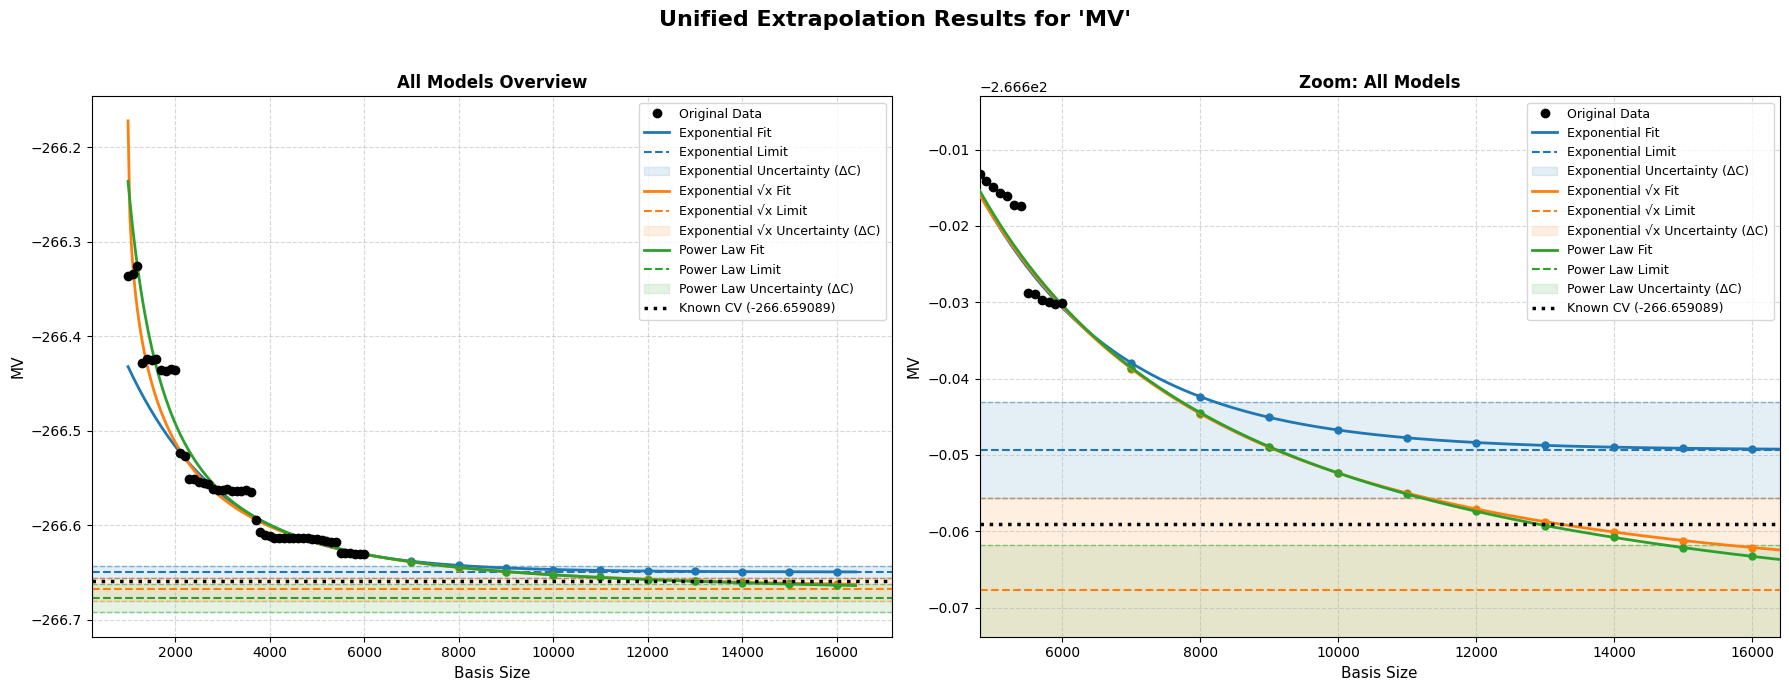

In [88]:
import extrapolator

extrapolator.unified_extrapolator(be_1po_init).fit()

In [75]:
reference_values = pd.read_csv('/home/aldiyar/extrapolation/large-dataset/reference_vals.txt', delim_whitespace=True)

/tmp/ipykernel_849/4049882052.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  reference_values = pd.read_csv('/home/aldiyar/extrapolation/large-dataset/reference_vals.txt', delim_whitespace=True)


In [76]:
import re
import extrapolator  # your unified_extrapolator module

class SystemExtrapolator:
    """
    Given one system's dataframe with 'basis size' and multiple expectation value columns,
    extrapolate each column to infinity using unified_extrapolator and return new *_inf columns
    WITH uncertainties.
    """

    def __init__(self, df, target_basis_size):
        if "basis size" not in df.columns:
            raise ValueError("DataFrame must contain 'basis size'.")
        self.df = df.copy()
        self.target_basis_size = target_basis_size

    def extrapolate_all(self):
        result_df = self.df.copy()
        expectation_columns = [c for c in self.df.columns if c != "basis size"]
        
        new_columns = {}

        for col in expectation_columns:
            extrap = extrapolator.unified_extrapolator(self.df)
            extrap.fit_column(col, self.target_basis_size)

            # Extract VALUES
            exp_inf = extrap.results['exponential'].params['C'].value
            exp_sq_inf = extrap.results['exponential_sq'].params['C'].value
            power_inf = extrap.results['power'].params['C'].value

            # Extract UNCERTAINTIES (ΔC for each model)
            exp_unc = extrap.uncertainties['exponential']
            exp_sq_unc = extrap.uncertainties['exponential_sq']
            power_unc = extrap.uncertainties['power']

            # Store in dictionary
            new_columns[f"{col}_exp_inf"] = exp_inf
            new_columns[f"{col}_exp_sq_inf"] = exp_sq_inf
            new_columns[f"{col}_power_inf"] = power_inf
            new_columns[f"{col}_exp_unc"] = exp_unc
            new_columns[f"{col}_exp_sq_unc"] = exp_sq_unc
            new_columns[f"{col}_power_unc"] = power_unc

        # Join all columns at once
        result_df = pd.concat([result_df, pd.DataFrame(new_columns, index=result_df.index)], axis=1)
        
        return result_df


def extrapolate_system(df, system_name, target_basis_size):
    """
    Extrapolate all expectation values for a system and return results WITH uncertainties.
    """
    extr = SystemExtrapolator(df, target_basis_size)
    res = extr.extrapolate_all()

    rows = []
    for col in df.columns:
        if col == "basis size":
            continue
        rows.append({
            "system": system_name,
            "expectation_value": col,
            # VALUES
            "exp_inf": res[f"{col}_exp_inf"].iloc[0],
            "exp_sq_inf": res[f"{col}_exp_sq_inf"].iloc[0],
            "power_inf": res[f"{col}_power_inf"].iloc[0],
            # UNCERTAINTIES
            "exp_unc": res[f"{col}_exp_unc"].iloc[0],
            "exp_sq_unc": res[f"{col}_exp_sq_unc"].iloc[0],
            "power_unc": res[f"{col}_power_unc"].iloc[0],
        })
    return pd.DataFrame(rows)


def get_target_basis_size(reference_values, system_name):
    """
    Parse basis size from the 'source' column (e.g., our_calc_16400).
    If not found for this expectation, fall back to another row of the same system.
    """
    sys_refs = reference_values[reference_values["system"] == system_name]

    # Try to extract basis size from any matching source
    for src in sys_refs["source"].dropna().unique():
        match = re.search(r"our_calc_(\d+)", src)
        if match:
            return int(match.group(1))

    raise ValueError(f"Could not determine target basis size for {system_name}")


# --- Example usage ---

systems = {
    "infBe_1Po-01": be_1po_init,
    "infBe_1Se-01": be_1se_init,
    "infBe_3Po-01": be_3po_init,
    "infBe_3Se-01": be_3se_init,
    "infLi_2Po-01": li_2po_init,
    "infLi_2Se-01": li_2se_init,
}

all_results = []
for sys_name, df in systems.items():
    target_basis_size = get_target_basis_size(reference_values, sys_name)
    all_results.append(extrapolate_system(df, sys_name, target_basis_size))

extrapolated_df = pd.concat(all_results, ignore_index=True)

# --- Merge with reference_values ---
reference_values = reference_values.merge(
    extrapolated_df,
    on=["system", "expectation_value"],
    how="left"
)

# Replace NaN with 0 if desired
reference_values = reference_values.fillna(0)


--- Fitting Exponential Model ---
  Initial guesses: C=-14.473451, A=0.000028, B=6.962569
  Model type: exp
  No known convergent value provided, using weight power n=1 for Exponential
Fitted parameters:
  C = -14.4734512629 ± 0.0000000061 (asymptote)
  A = 0.0000193528 ± 0.0000010051 (amplitude)
  B = 6.2020963839 ± 0.1304066804 (decay rate)
Parameter signs: C=negative, A=positive, B=positive
Fit quality: χ² = 6.837667e-14, RMSE = 3.661583e-08

--- Fitting Exponential SQ Model ---
  Initial guesses: C=-14.473451, A=0.000028, B=7.848533
  Model type: exp_sq
  No known convergent value provided, using weight power n=1 for Exponential SQ
Fitted parameters:
  C = -14.4734514373 ± 0.0000000189 (asymptote)
  A = 0.0000612295 ± 0.0000034881 (amplitude)
  B = 5.7975067122 ± 0.1172294418 (decay rate)
Parameter signs: C=negative, A=positive, B=positive
Fit quality: χ² = 2.339869e-13, RMSE = 6.773462e-08

--- Fitting Power Law Model ---
  No known convergent value provided, using weight power n

In [77]:
reference_values

,system,expectation_value,ref_value,uncertainty,source,exp_inf,exp_sq_inf,power_inf,exp_unc,exp_sq_unc,power_unc
0,infBe_1Po-01,Energy,-14.473451386869198743,0.000000001571315522,our_calc_16400,-14.473451262876102064,-14.473451437265969943,-14.473451470487358250,0.000000006086391113,0.000000018921659848,0.000000009289227592
1,infBe_1Po-01,MV,-266.659088807117598208,0.000015943136020269,our_calc_16400,-266.640288644075553748,-266.700480542132368100,-266.684708846882074340,0.003407352682913715,0.020423636905086487,0.015707273269112379
2,infBe_1Po-01,drach_MV,-266.664462793425059317,0.000005985582845369,our_calc_16400,-266.664260767244456929,-266.660957062279749152,-266.661567448543451064,0.000401968493921374,0.007628647858357485,0.007474417903241771
3,infBe_1Po-01,OO,-0.812091476559140046,0.000000041564738762,our_calc_16400,-0.812091362289512952,-0.812091538941689284,-0.812091241182684720,0.000000011904131184,0.000000116746321178,0.000000097823650200
4,infBe_1Po-01,1/r^2_1,14.216540761971746321,0.000000008542075491,our_calc_16400,14.216539813344393650,14.216541107404104594,14.216539470799897771,0.000000046240493879,0.000000156652012768,0.000135549659273670
...,...,...,...,...,...,...,...,...,...,...,...
115,infLi_2Se-01,drach_delta(r_12),0.181441544289981410,0.000000000004542505,our_calc_12000,0.181441544168078422,0.181441544382429598,0.181441546751045180,0.000000000005707082,0.000000000028787035,0.000000000410720133
116,infLi_2Se-01,prval(r_1),-102.770256511564326729,0.001889366435264605,our_calc_12000,-102.765066305389524359,-102.773847788419374183,-102.772487413011731405,0.000248185985725652,0.001888399939276708,0.001548688269350471
117,infLi_2Se-01,prval(r_12),0.091079437718323997,0.000011833424196001,our_calc_12000,0.090792040044963843,0.091325913183770785,0.091223774490658813,0.000042330783519314,0.000193993614278154,0.000173956676653322
118,infLi_2Se-01,SO1,0.000000000000000000,0.000000000000000000,our_calc_12000,0.000000000000000000,0.000000000000000000,0.000000000000000000,0.000000000000000000,0.000000000000000000,0.000000000000000000


In [ ]:
import numpy as np

def add_function_ranks(df):
    """
    Ranks functions using the "Calibrated and Penalized Relative Score".

    This method calculates a score that balances accuracy and calibration.
    It heavily penalizes models that fail to capture the true value within
    their uncertainty, and the penalty is proportional to the magnitude
    of that failure.

    The model with the LOWEST score is the best.
    """
    df = df.copy()

    # --- Extract Data Columns ---
    ref_value = df["ref_value"].values
    
    predictions = {
        "exp": df["exp_inf"].values,
        "exp_sq": df["exp_sq_inf"].values,
        "power": df["power_inf"].values
    }
    
    uncertainties = {
        "exp": df["exp_unc"].values,
        "exp_sq": df["exp_sq_unc"].values,
        "power": df["power_unc"].values
    }

    # --- Apply the Formula for Each Model ---
    for model_key in predictions.keys():
        pred_val = predictions[model_key]
        unc_val = uncertainties[model_key]

        # Use a small epsilon to prevent division by zero in all calculations
        epsilon = 1e-15

        # --- Calculate Score Components ---
        
        # 1. Base Score (Scale-Invariant Accuracy)
        relative_error = np.abs((pred_val - ref_value) / (ref_value + epsilon))

        # 2. Penalty Multiplier (Calibration Failure Ratio)
        absolute_error = np.abs(pred_val - ref_value)
        
        # The penalty is the ratio of the error to the uncertainty.
        # This is the Z-score, which measures the magnitude of the failure.
        calibration_failure_ratio = absolute_error / (unc_val + epsilon)

        # The penalty is applied ONLY if the model is uncalibrated.
        # If calibrated (ratio <= 1), the penalty multiplier is 1.
        # If uncalibrated (ratio > 1), the penalty is the ratio itself.
        penalty_multiplier = np.maximum(1.0, calibration_failure_ratio)

        # --- Final Score ---
        # The final score is the accuracy, amplified by any calibration failure.
        final_score = relative_error * penalty_multiplier
        
        df[f'score_{model_key}'] = final_score
        
    return df

In [91]:
df_ranked = add_function_ranks(reference_values)
# df_ranked.drop(columns=['exp_delta', 'exp_sq_delta', 'power_delta'], inplace = True)
df_ranked


,system,expectation_value,ref_value,uncertainty,source,exp_inf,exp_sq_inf,power_inf,exp_unc,exp_sq_unc,power_unc,score_exp,score_exp_sq,score_power
0,infBe_1Po-01,Energy,-14.473451386869198743,0.000000001571315522,our_calc_16400,-14.473451262876102064,-14.473451437265969943,-14.473451470487358250,0.000000006086391113,0.000000018921659848,0.000000009289227592,inf,inf,inf
1,infBe_1Po-01,MV,-266.659088807117598208,0.000015943136020269,our_calc_16400,-266.640288644075553748,-266.700480542132368100,-266.684708846882074340,0.003407352682913715,0.020423636905086487,0.015707273269112379,inf,inf,inf
2,infBe_1Po-01,drach_MV,-266.664462793425059317,0.000005985582845369,our_calc_16400,-266.664260767244456929,-266.660957062279749152,-266.661567448543451064,0.000401968493921374,0.007628647858357485,0.007474417903241771,0.0000007576044385,0.000013146600445317,0.000010857633039207
3,infBe_1Po-01,OO,-0.812091476559140046,0.000000041564738762,our_calc_16400,-0.812091362289512952,-0.812091538941689284,-0.812091241182684720,0.000000011904131184,0.000000116746321178,0.000000097823650200,inf,0.000000076817145652,inf
4,infBe_1Po-01,1/r^2_1,14.216540761971746321,0.000000008542075491,our_calc_16400,14.216539813344393650,14.216541107404104594,14.216539470799897771,0.000000046240493879,0.000000156652012768,0.000135549659273670,inf,inf,0.000000090821801883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,infLi_2Se-01,drach_delta(r_12),0.181441544289981410,0.000000000004542505,our_calc_12000,0.181441544168078422,0.181441544382429598,0.181441546751045180,0.000000000005707082,0.000000000028787035,0.000000000410720133,inf,inf,inf
116,infLi_2Se-01,prval(r_1),-102.770256511564326729,0.001889366435264605,our_calc_12000,-102.765066305389524359,-102.773847788419374183,-102.772487413011731405,0.000248185985725652,0.001888399939276708,0.001548688269350471,inf,inf,inf
117,infLi_2Se-01,prval(r_12),0.091079437718323997,0.000011833424196001,our_calc_12000,0.090792040044963843,0.091325913183770785,0.091223774490658813,0.000042330783519314,0.000193993614278154,0.000173956676653322,inf,inf,0.001584734995633112
118,infLi_2Se-01,SO1,0.000000000000000000,0.000000000000000000,our_calc_12000,0.000000000000000000,0.000000000000000000,0.000000000000000000,0.000000000000000000,0.000000000000000000,0.000000000000000000,0.0000000000000000,0.000000000000000000,0.000000000000000000


In [224]:
df_ranked

,system,expectation_value,ref_value,uncertainty,source,rank_exp,rank_exp_sq,rank_power
0,infBe_1Po-01,Energy,-14.473451386869198743,0.000000001571315522,our_calc_16400,0.716026671728456354,0.999999999999997335,0.770887878138008409
1,infBe_1Po-01,MV,-266.659088807117598208,0.000015943136020269,our_calc_16400,0.999999999999997891,0.325085001368685123,0.572015174525631331
2,infBe_1Po-01,drach_MV,-266.664462793425059317,0.000005985582845369,our_calc_16400,0.999999999999998002,0.116718399180635007,0.117253305012987169
3,infBe_1Po-01,OO,-0.812091476559140046,0.000000041564738762,our_calc_16400,0.928640434176909557,0.999999999999997113,0.237105093341566958
4,infBe_1Po-01,1/r^2_1,14.216540761971746321,0.000000008542075491,our_calc_16400,0.670082910343739457,0.999999999999997335,0.128370822879232321
...,...,...,...,...,...,...,...,...
115,infLi_2Se-01,drach_delta(r_12),0.181441544289981410,0.000000000004542505,our_calc_12000,0.999999999999997446,0.878370782817947671,0.094786432585956634
116,infLi_2Se-01,prval(r_1),-102.770256511564326729,0.001889366435264605,our_calc_12000,0.785474765573220934,0.619131113154657964,0.999999999999997113
117,infLi_2Se-01,prval(r_12),0.091079437718323997,0.000011833424196001,our_calc_12000,0.824125206845274461,0.585208037898171107,0.999999999999997224
118,infLi_2Se-01,SO1,0.000000000000000000,0.000000000000000000,our_calc_12000,0.997909453627326859,0.997909453731595897,0.999999999999998557


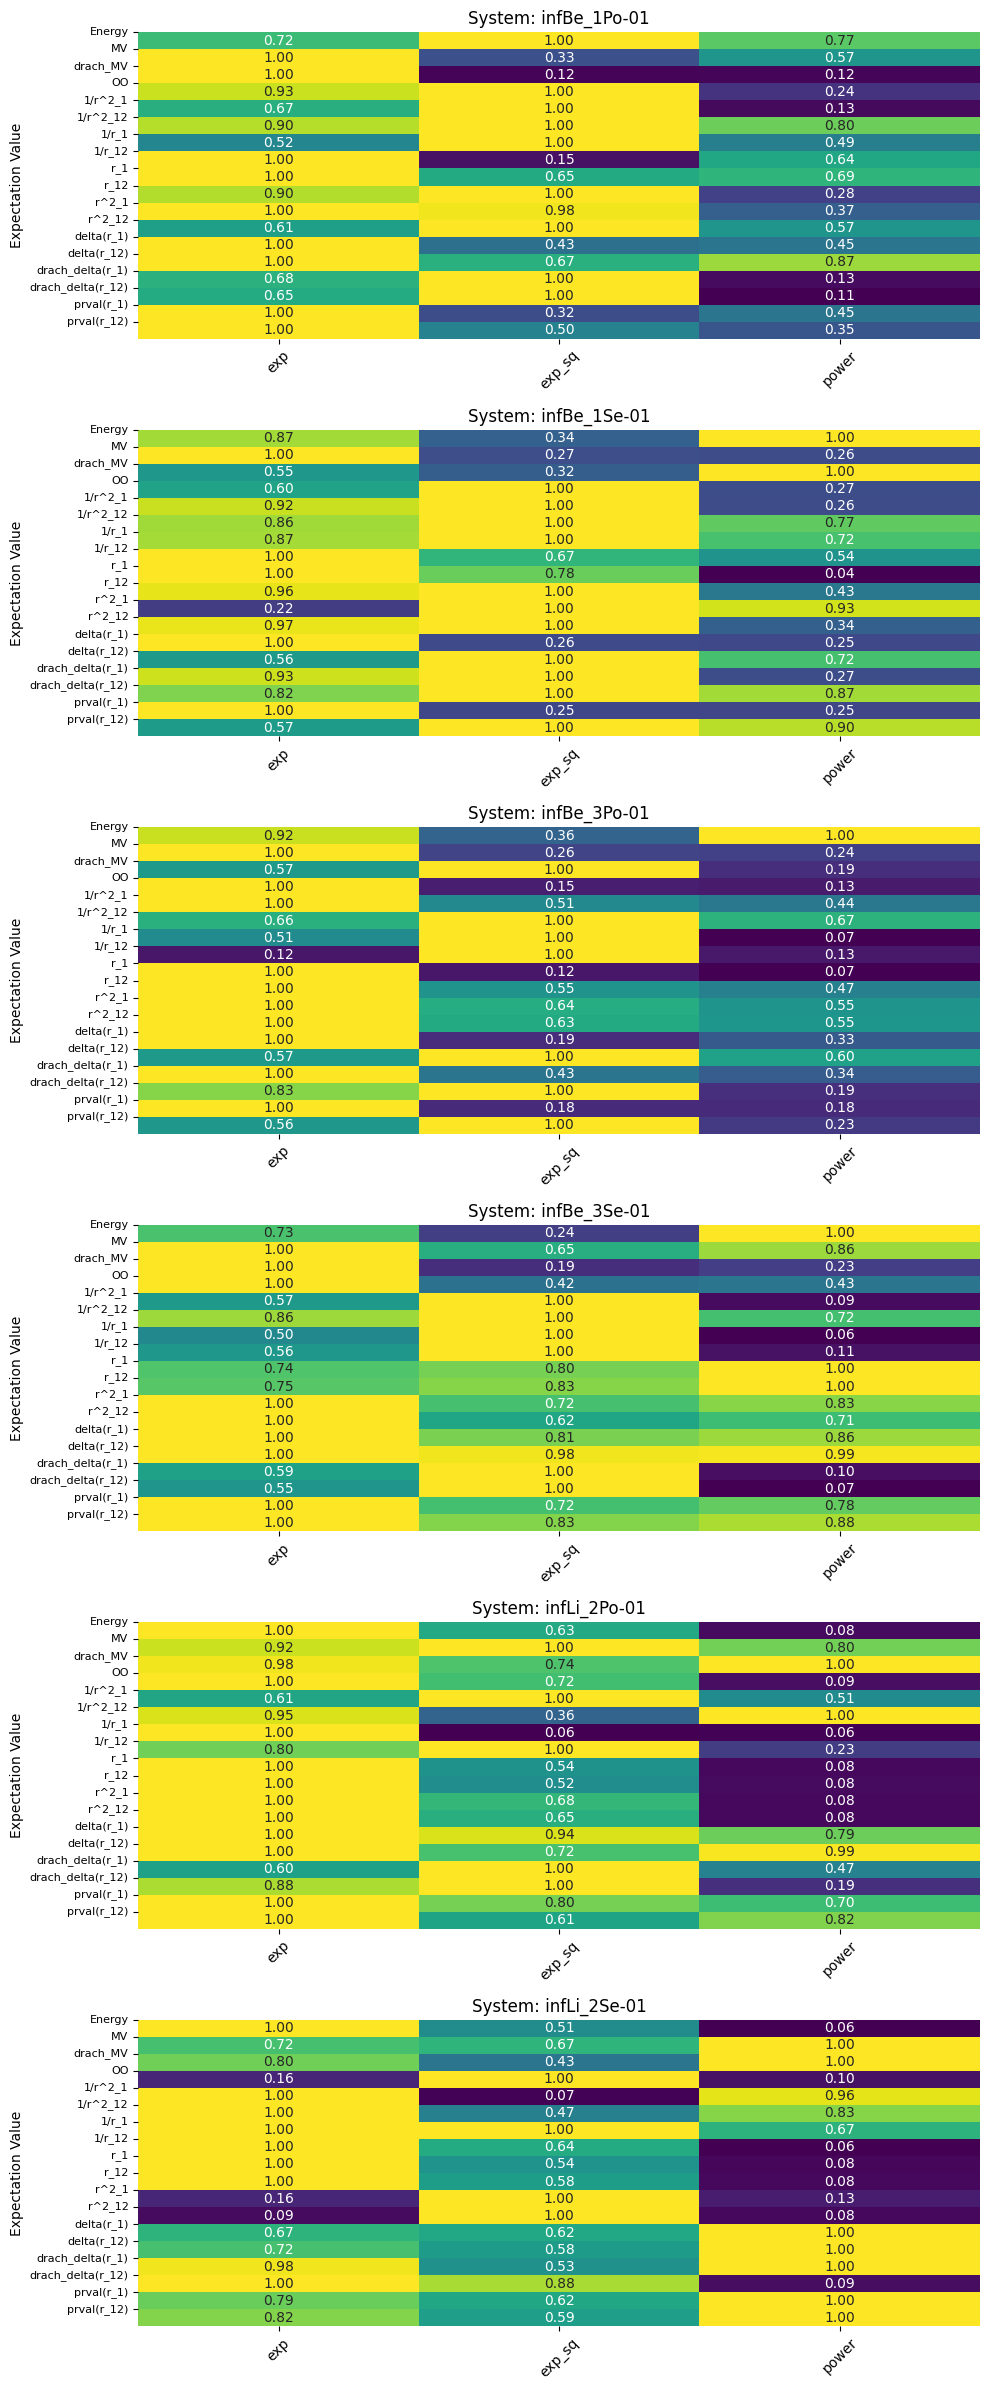

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt to long format
df_long = df_ranked.melt(
    id_vars=["system","expectation_value"],
    value_vars=["rank_exp","rank_exp_sq","rank_power"],
    var_name="method", value_name="rank"
)

# Clean method names
df_long["method"] = df_long["method"].str.replace("rank_", "")

# Full list of expectation values
all_expectations = [
    'Energy', 'MV', 'drach_MV', 'OO', '1/r^2_1', '1/r^2_12', '1/r_1',
    '1/r_12', 'r_1', 'r_12', 'r^2_1', 'r^2_12', 'delta(r_1)', 'delta(r_12)',
    'drach_delta(r_1)', 'drach_delta(r_12)', 'prval(r_1)', 'prval(r_12)'
]

# Plot one heatmap per system
systems = df_ranked["system"].unique()
n_systems = len(systems)

fig, axes = plt.subplots(
    n_systems, 1, figsize=(10, max(4*n_systems, 0.4*len(all_expectations)))
)

# Make axes iterable even if n_systems=1
if n_systems == 1:
    axes = [axes]

for ax, system in zip(axes, systems):
    pivot = df_long[df_long["system"]==system].pivot(
        index="expectation_value", columns="method", values="rank"
    )
    pivot = pivot.reindex(all_expectations)  # ensure all rows

    sns.heatmap(
        pivot, cmap="viridis", annot=True, fmt=".2f", cbar=False, ax=ax
    )
    ax.set_title(f"System: {system}")
    ax.set_ylabel("Expectation Value")
    ax.set_xlabel("")

    # Force all labels to show
    ax.set_yticks(range(len(all_expectations)))
    ax.set_yticklabels(all_expectations, fontsize=8)

    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()
